In [ ]:
%pip install imbalanced-learn

In [1]:
# Mounts Google Drive onto the Colab environment.
# Run this cell only if you'll use colab and your dataset is on drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
# Import data manipulation libraries.
import pandas as pd
import numpy as np

# Import data visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns

# Import statistical libraries for hypothesis testing.
from scipy import stats
import statistics as stat

# Import preprocessing modules.
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  # Used for data balancing.
from sklearn.linear_model import LogisticRegression

# Import libraries for data splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelling
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

# Import metrics for model evaluation.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For exporting the trained model
import pickle

In [3]:
# Load the train dataset.
train_df = pd.read_csv("/content/drive/MyDrive/Notebooks/ML Projects/Paitients_Files_Train.csv")
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
# Load the test dataset.
test_df = pd.read_csv("/content/drive/MyDrive/Notebooks/ML Projects/Paitients_Files_Test.csv")
test_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [5]:
# Get the shape of the training and testing dataframes.
train_df.shape,test_df.shape

((599, 11), (169, 10))

In [6]:
# Display the first few rows of the training dataframe.
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [7]:
# Display the first few rows of the testing dataframe.
test_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [8]:
# Display the concise summary of the training dataframe, including information about the data types,
# the number of non-null values, and memory usage.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [10]:
# Generate descriptive statistics of the training dataframe and transpose the result for better readability.
# It provides statistics such as count, mean, standard deviation, minimum, quartiles, and maximum for each numeric column.
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [11]:
# Checking for missing values.
train_df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [12]:
test_df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [13]:
# Count the occurrences of each unique value in the 'Sepsis' column of the training dataframe.
train_df['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In [14]:
# Retrieve and display the column names of the training df.
train_df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

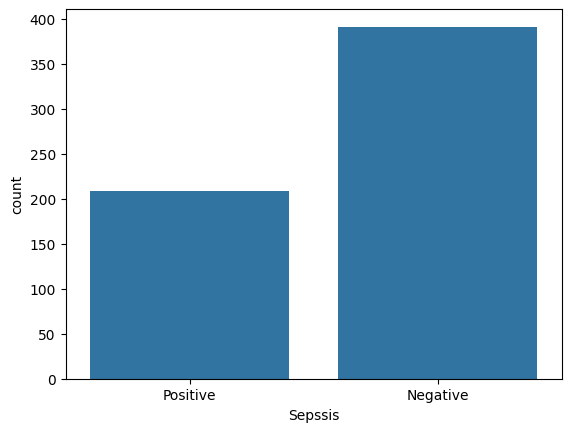

In [15]:
# Visualize the distribution of the 'Sepssis' column using a count plot.
# It displays the counts of observations in each category of the 'Sepssis' column.
sns.countplot(x='Sepssis', data=train_df)
plt.show()

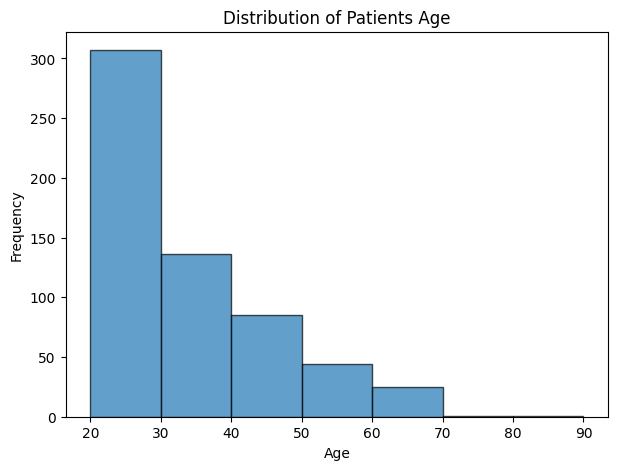

In [16]:
# Plot the distribution of ages for all the patients.
plt.figure(figsize=(7, 5))  # Set the size of the figure.
plt.hist(train_df['Age'], bins=7, range=(20, 90), edgecolor='k', alpha=0.7)  # Create a histogram.
plt.title("Distribution of Patients Age")  # Set the title of the plot.
plt.xlabel("Age")  # Set the label for the x-axis.
plt.ylabel("Frequency")  # Set the label for the y-axis.
plt.show()  # Display the plot.

In [17]:
# Calculate the summary statistics of the age column.
mean_age = train_df['Age'].mean()  # Calculate the mean age.
median_age = train_df['Age'].median()  # Calculate the median age.
min_age = train_df['Age'].min()  # Find the minimum age.
max_age = train_df['Age'].max()  # Find the maximum age.

# Print summary statistics.
print(f"Mean Age: {mean_age:.2f}")  # Print the mean age with 2 decimal places.
print(f"Median Age: {median_age}")  # Print the median age.
print(f"Minimum Age: {min_age}")  # Print the minimum age.
print(f"Maximum Age: {max_age}")  # Print the maximum age.

Mean Age: 33.29
Median Age: 29.0
Minimum Age: 21
Maximum Age: 81


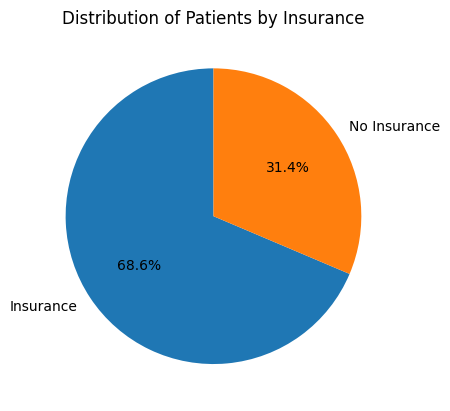

In [18]:
# Count the number of patients with insurance.
insurance_count = train_df['Insurance'].value_counts()

# Define labels for the pie chart.
labels = ['Insurance', 'No Insurance']

# Set the title of the plot.
plt.title('Distribution of Patients by Insurance')

# Plot the pie chart.
plt.pie(insurance_count, labels=labels, autopct='%1.1f%%', startangle=90)

# Display the plot.
plt.show()

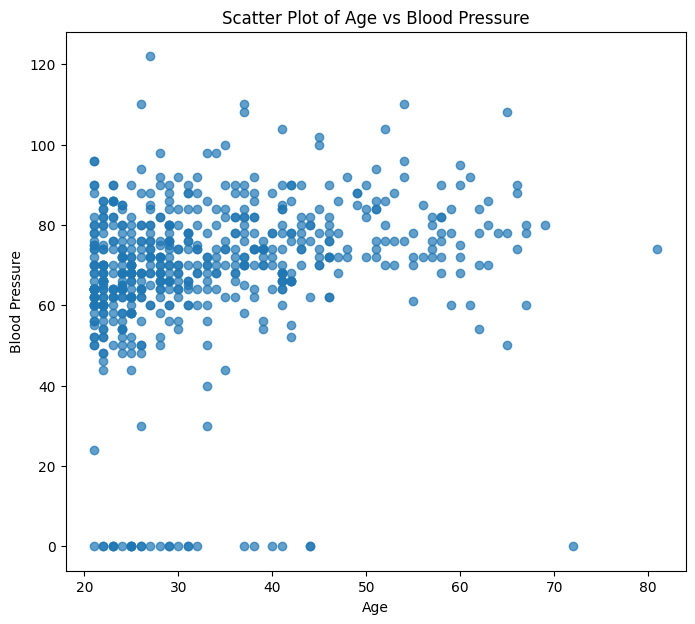

In [19]:
# Set the size of the figure.
plt.figure(figsize=(8, 7))

# Create a scatter plot of Age vs. Blood Pressure (PR).
plt.scatter(train_df['Age'], train_df['PR'], alpha=0.7)

# Set the label for the x-axis.
plt.xlabel('Age')

# Set the label for the y-axis.
plt.ylabel('Blood Pressure')

# Set the title of the plot.
plt.title("Scatter Plot of Age vs Blood Pressure")

# Display the plot.
plt.show()

<Axes: >

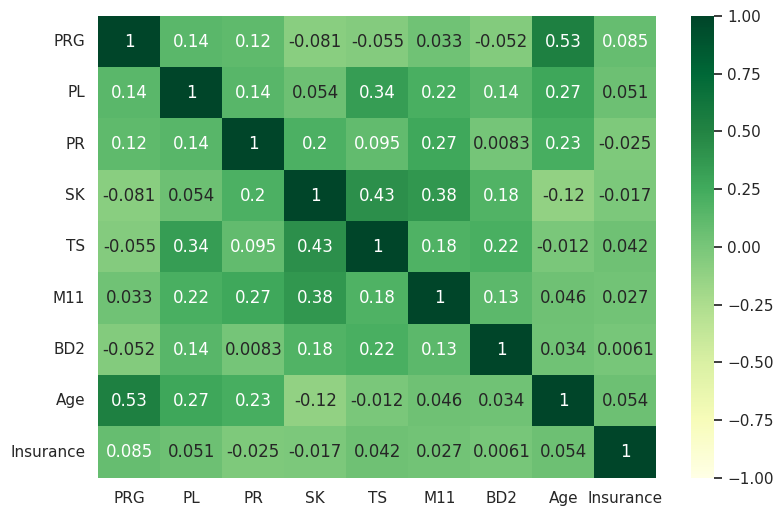

In [20]:
# Calculate the correlation coefficients between numeric columns.
pearson_r = train_df.corr(method='pearson', numeric_only=True)

# Set the theme for seaborn.
sns.set_theme()

# Create a subplot with a specific size.
f, ax = plt.subplots(figsize=(9, 6))

# Create a heatmap to visualize the correlation matrix.
sns.heatmap(data=pearson_r, vmin=-1, vmax=1, annot=True, cmap="YlGn", ax=ax)


In [21]:
# Define negative/positive sepsis cases by filtering rows.
Sepsis_Negative = train_df[train_df['Sepssis'] == 'Negative']
Sepsis_Positive = train_df[train_df['Sepssis'] == 'Positive']

In [22]:
# Perform an independent two-sample t-test between the ages of negative and positive sepsis cases,
# assuming unequal variances between the groups.
  # A method used to test whether the unknown population means of two groups are equal or not.
t, p = stats.ttest_ind(Sepsis_Negative['Age'], Sepsis_Positive['Age'], equal_var=False)
print(p)

1.085959278630566e-07


<Axes: xlabel='Age', ylabel='Count'>

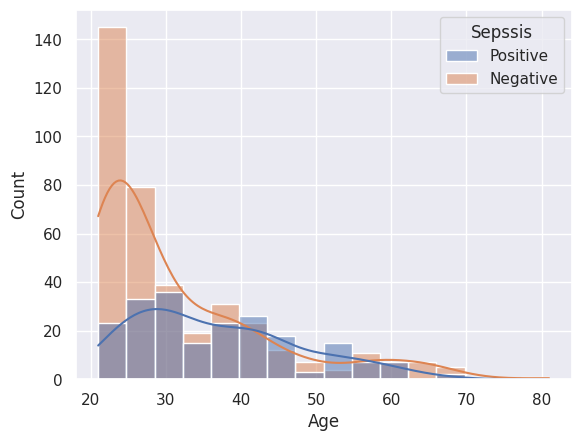

In [23]:
# Create a histogram plot of the 'Age' column, with separate distributions for 'Sepssis' values.
sns.histplot(data=train_df, x='Age', hue='Sepssis', kde=True)

In [24]:
# Renaming the seppsis, BMI and Blood pressure columns
train_df = train_df.rename(columns={'Sepssis': 'Sepsis'})
train_df = train_df.rename(columns={'M11': 'BMI'})
train_df = train_df.rename(columns={'PR': 'BP'})

# Test dataset
test_df = test_df.rename(columns={'M11': 'BMI'})
test_df = test_df.rename(columns={'PR': 'BP'})

In [25]:
test_df.head()

,ID,PRG,PL,BP,SK,TS,BMI,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [26]:
# Checking for duplicates in the train dataset
train_df.duplicated().sum()

0

In [27]:
# Drop unneeded columns.
train_df.drop(['ID','Insurance'],axis=1,inplace=True)
test_df.drop(['ID','Insurance'],axis=1,inplace=True)

In [28]:
test_df.head()

,PRG,PL,BP,SK,TS,BMI,BD2,Age
0,1,109,38,18,120,23.1,0.407,26
1,1,108,88,19,0,27.1,0.400,24
2,6,96,0,0,0,23.7,0.190,28
3,1,124,74,36,0,27.8,0.100,30
4,7,150,78,29,126,35.2,0.692,54


In [29]:
# Initializing an instance of the LabelEncoder class.
label_encoder = LabelEncoder()

# Encoding the target column 'Sepsis' in the training dataframe.
train_df['Sepsis'] = label_encoder.fit_transform(train_df['Sepsis'])

In [30]:
# Splitting the dataset into features (X) and target variable (y).
X = train_df.drop('Sepsis', axis=1)
y = train_df['Sepsis']

In [31]:
# Cloning the SMOTE class and specifying the sampling strategy to balance the minority class.
smote = SMOTE(sampling_strategy='minority')

# Resampling the features (X) and labels (y) using SMOTE.
X_resampled, y_resampled = smote.fit_resample(X, y)

# Counting the occurrences of each class in the resampled labels (y_resampled).
y_resampled.value_counts()

Sepsis
1    391
0    391
Name: count, dtype: int64

In [32]:
print(X_resampled.shape)
print(y_resampled.shape)

(782, 8)
(782,)


In [33]:
# Split the data into training and evaluation sets.
X_train, X_eval, y_train, y_eval = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)

In [34]:
X_train.shape,X_eval.shape,y_train.shape,y_eval.shape

((625, 8), (157, 8), (625,), (157,))

In [35]:
# Cloning the StandardScaler class and specifying the output format as pandas DataFrame.
scaler = StandardScaler().set_output(transform="pandas")

# Fitting and transforming the selected columns in the training dataset.
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the selected columns in the evaluation dataset.
X_eval_scaled = scaler.transform(X_eval)

In [36]:
# Check the scaled training set.
X_train_scaled.head()

,PRG,PL,BP,SK,TS,BMI,BD2,Age
547,0.013204,0.196134,-0.060948,0.008818,0.703088,0.074897,-1.040411,-0.526203
474,0.013204,-0.331709,-0.274350,-1.291563,-0.704472,-0.493530,-1.139396,-0.879645
707,-1.209418,1.655464,1.059415,0.318432,-0.704472,1.559023,0.492026,-0.968005
293,-0.903762,0.102985,-1.127960,1.494967,0.940508,1.076412,0.278418,-0.879645
729,0.013204,1.841761,-0.274350,0.566124,4.798579,-0.331122,0.006991,2.212967


In [37]:
# Check the scaled evaluation on the predictor set.
X_eval_scaled.head()

,PRG,PL,BP,SK,TS,BMI,BD2,Age
378,0.013204,0.972373,0.312506,-1.291563,-0.704472,2.132063,-0.813328,-0.172762
309,-0.598107,-0.021213,-0.060948,0.442278,1.033780,0.047829,1.041185,-0.349483
668,0.013204,0.910274,1.539570,-1.291563,-0.704472,0.299375,-0.555451,1.947886
112,-0.903762,-1.107948,0.365857,0.813815,-0.390739,-0.182249,-0.947249,-0.968005
583,1.235827,-0.766403,0.365857,-1.291563,-0.704472,0.832800,-0.953071,0.710841


In [42]:
# Defining a list of models that will be evaluated.
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Trees", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("XGBoost", XGBClassifier()),
]

In [43]:
# Initializing an empty list to store the model results.
results_list = []

# Iterate over the models and train, evaluate, and store the results.
for model_name, model in models:
    # Fitting the models to the training dataset.
    model.fit(X_train_scaled, y_train)

    # Make predictions using the evaluation dataset.
    y_pred = model.predict(X_eval_scaled)

    # Calculate performance metrics.
    accuracy = accuracy_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)
    auc_roc = roc_auc_score(y_eval, y_pred)

    # Store the results in a dictionary.
    model_results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }

    # Append the model results to the list.
    results_list.append(model_results)

# Convert the list of dictionaries to a DataFrame.
results_df = pd.DataFrame(results_list)

In [44]:
# Let's see our results!
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.713376,0.720000,0.692308,0.705882,0.713242
1,Decision Trees,0.732484,0.714286,0.769231,0.740741,0.732717
2,Random Forest,0.764331,0.741176,0.807692,0.773006,0.764606
3,SVM,0.738854,0.746667,0.717949,0.732026,0.738721
4,KNN,0.719745,0.677083,0.833333,0.747126,0.720464
5,Naive Bayes,0.694268,0.708333,0.653846,0.680000,0.694012
6,Gradient Boosting,0.738854,0.746667,0.717949,0.732026,0.738721
7,AdaBoost,0.732484,0.736842,0.717949,0.727273,0.732392
8,XGBoost,0.777070,0.772152,0.782051,0.777070,0.777102


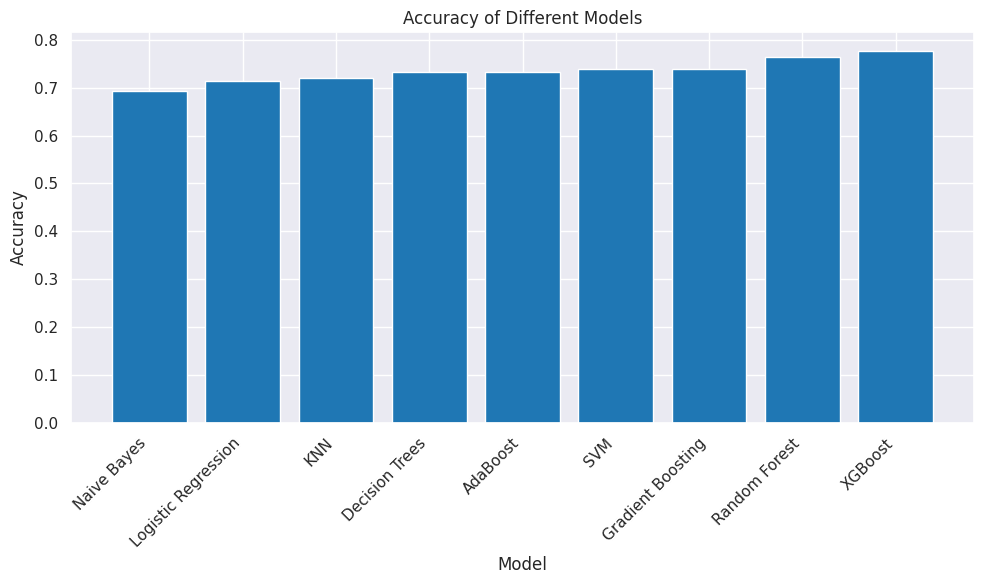

In [45]:
# import matplotlib.pyplot as plt
# import numpy as np

# Assuming results_df is your DataFrame containing model names and accuracies
# Sort the DataFrame by accuracy
results_df = results_df.sort_values(by='Accuracy')

plt.figure(figsize=(10, 6))

# Define a single color for all bars
color = plt.cm.tab10(0)  # Choosing the first color from the 'tab10' colormap

# Create a bar plot for accuracy
plt.bar(results_df['Model'], results_df['Accuracy'], color=color)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()


In [47]:
# Let's save our models!
for name, model in models:
    # Define the file name to save the model
    filename = f'{name}_model.pkl'

    # Save the model to a file using pickle
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

    print(f"{name} model saved as {filename}")

Logistic Regression model saved as Logistic Regression_model.pkl
Decision Trees model saved as Decision Trees_model.pkl
Random Forest model saved as Random Forest_model.pkl
SVM model saved as SVM_model.pkl
KNN model saved as KNN_model.pkl
Naive Bayes model saved as Naive Bayes_model.pkl
Gradient Boosting model saved as Gradient Boosting_model.pkl
AdaBoost model saved as AdaBoost_model.pkl
XGBoost model saved as XGBoost_model.pkl
